# Data Exploration

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/titanic.xls')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# dataset contains (n Rows , n Cols)
df.shape

(1309, 14)

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
# determine how many null values in each col and type of them
# example => for col 'boat' there are 486 non-null value from 1309 value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Data Cleaning

In [ ]:
# axis = 1 => dealing with cols
# inplace = True => to apply changes to data frame
df.drop(['name', 'fare', 'home.dest'] , axis=1, inplace=True)

In [ ]:
# fill null values in col 'age' with zero
df['age'] = df['age'].fillna(0)

In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
0,1,1,female,29.0000,0,0,24160,B5,S,2,NaN
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,NaN
2,1,0,female,2.0000,1,2,113781,C22 C26,S,NaN,NaN
3,1,0,male,30.0000,1,2,113781,C22 C26,S,NaN,135.0
4,1,0,female,25.0000,1,2,113781,C22 C26,S,NaN,NaN


# Histogram

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib inline       # for only inline plotting in jupyter

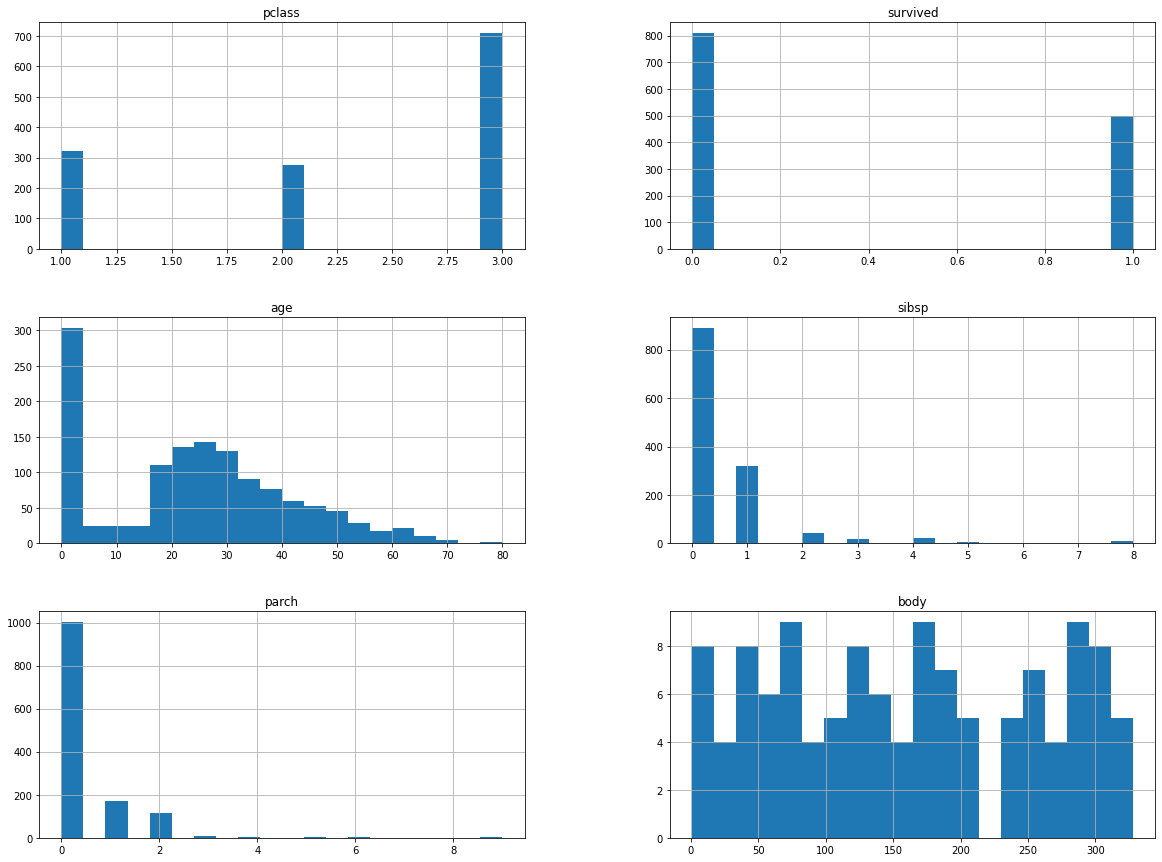

In [ ]:
df.hist(bins=20, figsize=(20,15))
plt.show()

# Outliers

In [ ]:
# df_copy = df  
# means copy by reference so any change applied to the original will affect the copied version and vise versa
df_copy = df.copy()

In [ ]:
# loc => select row or col based on 'label'
# iloc => select row or col based on 'index'
df_copy['age'].iloc[:10] = 500

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_copy.head(15)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
0,1,1,female,500.0,0,0,24160,B5,S,2,NaN
1,1,1,male,500.0,1,2,113781,C22 C26,S,11,NaN
2,1,0,female,500.0,1,2,113781,C22 C26,S,NaN,NaN
3,1,0,male,500.0,1,2,113781,C22 C26,S,NaN,135.0
4,1,0,female,500.0,1,2,113781,C22 C26,S,NaN,NaN
5,1,1,male,500.0,0,0,19952,E12,S,3,NaN
6,1,1,female,500.0,1,0,13502,D7,S,10,NaN
7,1,0,male,500.0,0,0,112050,A36,S,NaN,NaN
8,1,1,female,500.0,2,0,11769,C101,S,D,NaN
9,1,0,male,500.0,0,0,PC 17609,NaN,C,NaN,22.0


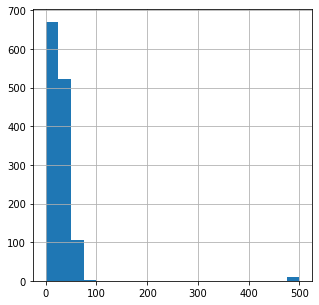

In [ ]:
df_copy['age'].hist(bins=20, figsize=(5,5))
plt.show()

In [ ]:
df_copy[df_copy['age'] > 100 ]['age'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
df_copy.iloc[5]

pclass          1
survived        1
sex          male
age         500.0
sibsp           0
parch           0
ticket      19952
cabin         E12
embarked        S
boat            3
body          NaN
Name: 5, dtype: object

In [ ]:
df_copy.drop(df_copy[df_copy['age'] > 100 ]['age'].index, inplace=True)

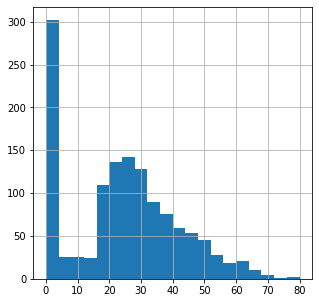

In [ ]:
df_copy['age'].hist(bins=20, figsize=(5,5))
plt.show()

In [ ]:
df_copy.shape

(1299, 11)

# Questions

In [ ]:
# return every repeated value in a column 
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [ ]:
df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# how many survived men ?
gender_df = df[df['sex'] == 'male']

survived = gender_df[gender_df['survived'] == 1]
survived.shape[0] # returns only rows

161

In [ ]:
for gen in df['sex'].unique():
    print(gen)
    gender_df = df[ df['sex']==gen ]
    survived = gender_df[ gender_df['survived']==1 ]
    survived_percentage = ( survived.shape[0] / gender_df.shape[0] ) * 100
    print("Count: ", gender_df.shape[0])
    print("Survived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n=====\n")

female
Count:  466
Servived  :  72.75 %

=====

male
Count:  843
Servived  :  19.10 %

=====



In [ ]:
for x_class in df['pclass'].unique():
    print(x_class)
    
    x_df = df[ df['pclass']==x_class ]
    survived = x_df[ x_df['survived']==1 ]
    
    survived_percentage = ( survived.shape[0] / x_df.shape[0] ) * 100
    
    print("Count: ", x_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n====\n")

1
Count:  323
Servived  :  61.92 %

====

2
Count:  277
Servived  :  42.96 %

====

3
Count:  709
Servived  :  25.53 %

====



In [ ]:
def age_to_category( age ):
    if age < 4:
        return 0 #"baby"
    elif age < 10:
        return 1 #"child"
    elif age < 21:
        return 2 #"teen"
    elif age < 33:
        return 3 #"young adult"
    elif age < 50:
        return 4 #"adult"
    return 5 #"elder"

age_cats = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "young adult",
    4: "adult",
    5: "elder"
}

In [ ]:
df['age_phase'] = df['age']

In [ ]:
## 1st way
for i in range( df.shape[0] ):       # df.shape[0] => no of rows in data frame
    df['age_phase'].iloc[i] = age_to_category( df['age'].iloc[i] )

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body,age_phase
0,1,1,female,29.0000,0,0,24160,B5,S,2,NaN,3.0
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,NaN,0.0
2,1,0,female,2.0000,1,2,113781,C22 C26,S,NaN,NaN,0.0
3,1,0,male,30.0000,1,2,113781,C22 C26,S,NaN,135.0,3.0
4,1,0,female,25.0000,1,2,113781,C22 C26,S,NaN,NaN,3.0


In [ ]:
## 2nd way [MOST USED]
df['age_phase'] = df['age'].apply( age_to_category )

In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body,age_phase
0,1,1,female,29.0000,0,0,24160,B5,S,2,NaN,3
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,NaN,0
2,1,0,female,2.0000,1,2,113781,C22 C26,S,NaN,NaN,0
3,1,0,male,30.0000,1,2,113781,C22 C26,S,NaN,135.0,3
4,1,0,female,25.0000,1,2,113781,C22 C26,S,NaN,NaN,3


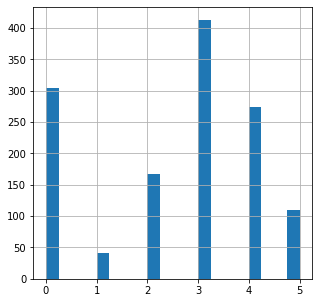

In [ ]:
df['age_phase'].hist(bins=20, figsize=(5,5))

In [ ]:
for phase in df['age_phase'].unique():
    print( age_cats[phase] )
    
    phase_df = df[ df['age_phase']==phase ]
    survived = phase_df[ phase_df['survived'] == 1 ]
    
    survived_percentage = ( survived.shape[0] / phase_df.shape[0] ) * 100
    
    print("Count: ", phase_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n=========\n")

young adult
Count:  413
Servived  :  38.26 %


baby
Count:  304
Servived  :  32.57 %


adult
Count:  274
Servived  :  40.51 %


elder
Count:  110
Servived  :  40.00 %


teen
Count:  167
Servived  :  38.32 %


child
Count:  41
Servived  :  58.54 %




In [ ]:
# sep => separator 
df.to_csv('new_set.csv', sep='\t', encoding='utf8' )

In [ ]:
new_df = pd.read_csv('new_set.csv', sep='\t' ,encoding='utf8')

In [ ]:
new_df.head()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body,age_phase
0,0,1,1,female,29.0000,0,0,24160,B5,S,2,NaN,3
1,1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,NaN,0
2,2,1,0,female,2.0000,1,2,113781,C22 C26,S,NaN,NaN,0
3,3,1,0,male,30.0000,1,2,113781,C22 C26,S,NaN,135.0,3
4,4,1,0,female,25.0000,1,2,113781,C22 C26,S,NaN,NaN,3
